In [1]:
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import glob

In [6]:
# データの取得
data_path = glob.glob("../../data/house*/train.csv")[0]
data = pd.read_csv(data_path)
data = data[['GrLivArea','GarageArea','PoolArea','BedroomAbvGr','TotRmsAbvGrd']]
data.head()

,GrLivArea,GarageArea,PoolArea,BedroomAbvGr,TotRmsAbvGrd
0,1710,548,0,3,8
1,1262,460,0,3,6
2,1786,608,0,3,6
3,1717,642,0,3,7
4,2198,836,0,4,9


In [44]:
## 行列の標準化
std_sc = StandardScaler()
std_sc.fit(data)
std_data = std_sc.transform(data)
std_data_df = pd.DataFrame(std_data, columns = data.columns)
std_data_df.head()

,GrLivArea,GarageArea,PoolArea,BedroomAbvGr,TotRmsAbvGrd
0,0.370333,0.351000,-0.068692,0.163779,0.912210
1,-0.482512,-0.060731,-0.068692,0.163779,-0.318683
2,0.515013,0.631726,-0.068692,0.163779,-0.318683
3,0.383659,0.790804,-0.068692,0.163779,0.296763
4,1.299326,1.698485,-0.068692,1.390023,1.527656


In [45]:
eig = pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x+1) for x in range(len(std_data_df.columns))], columns=["固有値"]).T
print("固有値")
eig.head()

固有値


,PC1,PC2,PC3,PC4,PC5
固有値,2.561248,0.993649,0.951741,0.356274,0.140515


In [46]:
# 主成分分析の実行
pca = PCA()
pca.fit(std_data_df)
pca_cor = pca.transform(std_data_df)
print("分散共分散行列\n", pca.get_covariance())

分散共分散行列
 [[1.0006854  0.46931893 0.17032199 0.52162679 0.82605517]
 [0.46931893 1.0006854  0.06108911 0.06529725 0.33805366]
 [0.17032199 0.06108911 1.0006854  0.07075104 0.08381476]
 [0.52162679 0.06529725 0.07075104 1.0006854  0.67708369]
 [0.82605517 0.33805366 0.08381476 0.67708369 1.0006854 ]]


In [47]:
eig_vec = pd.DataFrame(pca.components_.T, index = data.columns, columns = ["PC{}".format(x+1) for x in range(len(std_data_df.columns))])
print("固有ベクトルの行列表示")
eig_vec.head()

固有ベクトルの行列表示


,PC1,PC2,PC3,PC4,PC5
GrLivArea,0.572992,0.056600,-0.089095,0.510472,0.632422
GarageArea,0.322479,0.399551,-0.726493,-0.451983,-0.065455
PoolArea,0.127334,0.821238,0.549384,-0.056716,-0.065691
BedroomAbvGr,0.462778,-0.368494,0.399625,-0.668221,0.209356
TotRmsAbvGrd,0.580784,-0.164122,0.052406,0.292223,-0.740009


In [50]:
ev = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(std_data_df.columns))], columns=['寄与率']).T
print("寄与率")
ev.head()

寄与率


,PC1,PC2,PC3,PC4,PC5
寄与率,0.511899,0.198594,0.190218,0.071206,0.028084


In [52]:
t_ev = pd.DataFrame(pca.explained_variance_ratio_.cumsum(), index=["PC{}".format(x + 1) for x in range(len(std_data_df.columns))], columns=['累積寄与率']).T
print("累積寄与率")
t_ev.head()

累積寄与率


,PC1,PC2,PC3,PC4,PC5
累積寄与率,0.511899,0.710492,0.90071,0.971916,1.0


In [53]:
cor = pd.DataFrame(pca_cor, columns=["PC{}".format(x + 1) for x in range(len(std_data_df.columns))])
print("主成分得点")
cor.head()

主成分得点


,PC1,PC2,PC3,PC4,PC5
0,0.922232,-0.105274,-0.212477,0.191422,-0.425011
1,-0.414100,-0.116036,0.098121,-0.417530,-0.026547
2,0.380777,0.217096,-0.493819,-0.221302,0.558985
3,0.714253,0.172213,-0.565432,-0.180407,0.010066
4,2.813992,-0.067176,-0.751893,-0.582948,-0.124410


次元削減後のデータ


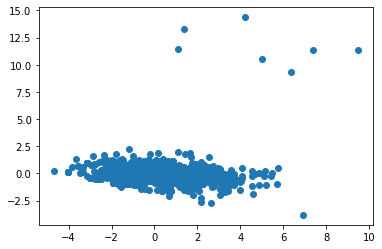

In [62]:
print("次元削減後のデータ")
plt.scatter(cor["PC1"],cor["PC2"])